In [270]:

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [271]:
pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [272]:
#read the data
df = pd.read_csv('/Users/liu/Desktop/midterm_data.csv')

In [273]:
#get a summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [274]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [275]:
#drop duplicates
df.drop_duplicates()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [276]:
#find missing values
df.isnull().sum()

userID               0
age                  0
sessions             0
time_spent           0
pages_visited        0
cart_items           0
cart_value           0
checkout_status      0
device             100
location            30
dtype: int64

In [277]:
# Handle missing values 
df.dropna(inplace=True)  # Remove rows with missing values


In [278]:
df.describe(include='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4871 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4871 non-null   int64  
 1   age              4871 non-null   int64  
 2   sessions         4871 non-null   int64  
 3   time_spent       4871 non-null   float64
 4   pages_visited    4871 non-null   int64  
 5   cart_items       4871 non-null   int64  
 6   cart_value       4871 non-null   float64
 7   checkout_status  4871 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4871 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 418.6+ KB


In [279]:
df.describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4871.000000,4871.00000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000
mean,2503.251488,41.53295,5.023609,25.172038,5.777458,14.971258,149.459444,0.273455
std,1445.707937,14.04452,2.589914,9.821864,2.566198,6.054916,68.811486,0.445778
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1251.500000,29.00000,3.000000,18.298029,4.000000,10.000000,92.415000,0.000000
50%,2505.000000,42.00000,5.000000,25.054759,6.000000,15.000000,143.020000,0.000000
75%,3760.500000,54.00000,7.000000,31.991099,8.000000,20.000000,198.550000,1.000000
max,5000.000000,65.00000,9.000000,90.000000,12.000000,25.000000,427.400000,1.000000


In [280]:
df.describe(include='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4871 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4871 non-null   int64  
 1   age              4871 non-null   int64  
 2   sessions         4871 non-null   int64  
 3   time_spent       4871 non-null   float64
 4   pages_visited    4871 non-null   int64  
 5   cart_items       4871 non-null   int64  
 6   cart_value       4871 non-null   float64
 7   checkout_status  4871 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4871 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 418.6+ KB


<Axes: xlabel='checkout_status', ylabel='Count'>

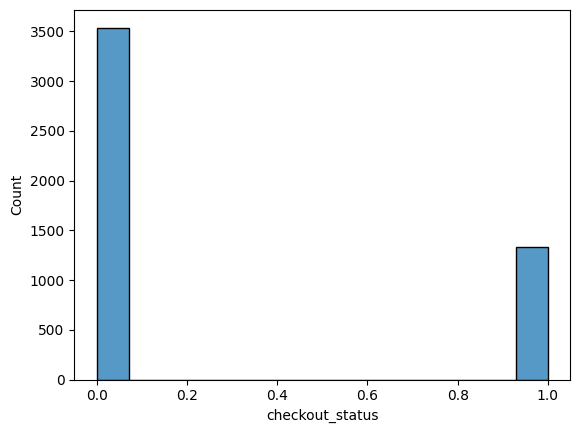

In [281]:
sns.histplot(df['checkout_status'])

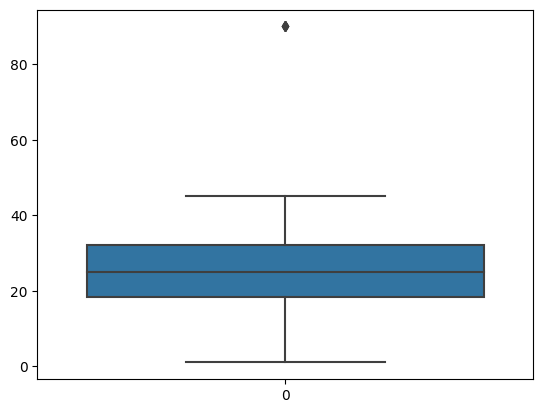

In [282]:
sns.boxplot(df['time_spent'])
plt.show()


In [283]:
drop_time_spent_outliers = df[df['time_spent']>80].index
drop_time_spent_outliers

Index([284, 2494, 2833, 3957], dtype='int64')

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4871 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4871 non-null   int64  
 1   age              4871 non-null   int64  
 2   sessions         4871 non-null   int64  
 3   time_spent       4871 non-null   float64
 4   pages_visited    4871 non-null   int64  
 5   cart_items       4871 non-null   int64  
 6   cart_value       4871 non-null   float64
 7   checkout_status  4871 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4871 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 547.6+ KB


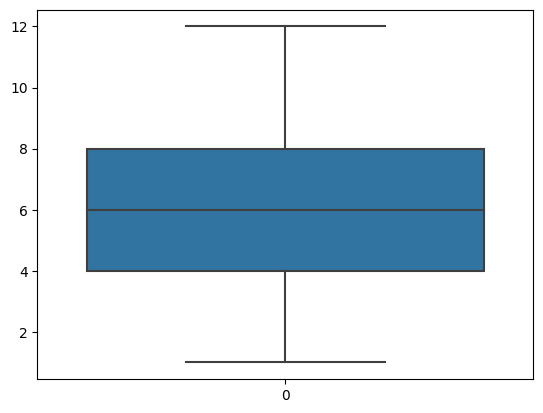

In [285]:
sns.boxplot(df['pages_visited'])
plt.show()

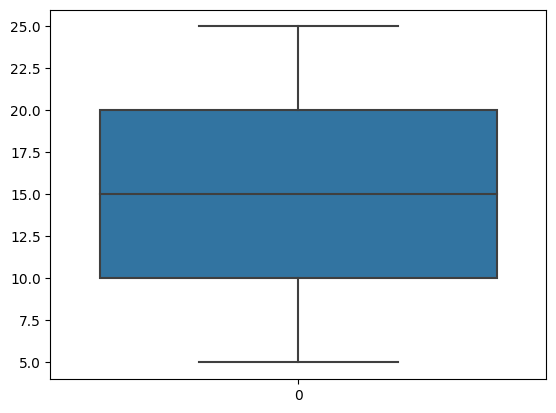

In [286]:
sns.boxplot(df['cart_items'])
plt.show()

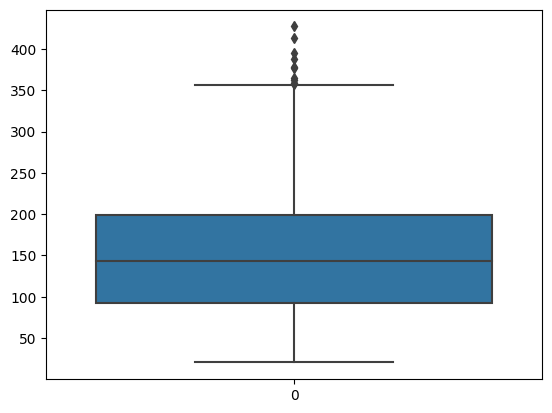

In [287]:
sns.boxplot(df['cart_value'])
plt.show()
#from the box the outlier of Units Sold aren't disdinct,so don't drop 

In [288]:
# By location
df.groupby('location')[['time_spent','cart_items','cart_value','checkout_status']].mean()
#location doesn't impcat ime_spent	cart_items	cart_value	checkout_status significantly

,time_spent,cart_items,cart_value,checkout_status
location,,,,
Location 1,25.657852,15.183230,152.872505,0.280538
Location 2,24.967337,15.012821,149.232628,0.267094
Location 3,24.875527,14.891784,147.684780,0.265531
Location 4,25.165525,14.783074,147.568424,0.283074
Location 5,25.198461,15.002121,150.127911,0.270414


In [289]:
# By device
df.groupby('device')[['time_spent','cart_items','cart_value','checkout_status']].mean()
#device doesn't impcat impcat ime_spent	cart_items	cart_value	checkout_status significantly

,time_spent,cart_items,cart_value,checkout_status
device,,,,
Desktop,25.501610,14.892942,149.291967,0.285488
Mobile,24.637274,15.144672,151.106486,0.263938
Tablet,25.093259,14.919528,147.408498,0.255365


locations and device doesn't impcat impcat ime_spent	cart_items	cart_value	checkout_status

In [290]:
checkout_grouped = df.groupby('checkout_status')
count_values = checkout_grouped.size()
print("\nCount values:")
print(count_values)


Count values:
checkout_status
0    3539
1    1332
dtype: int64


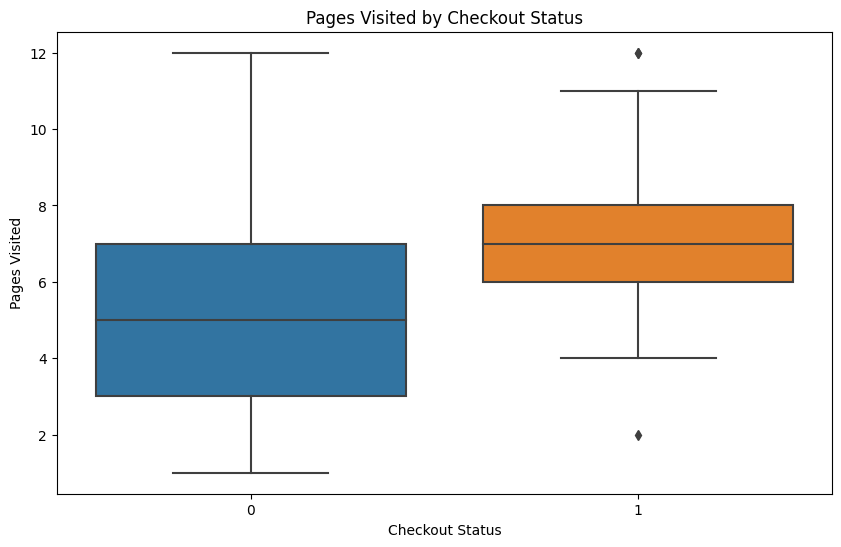

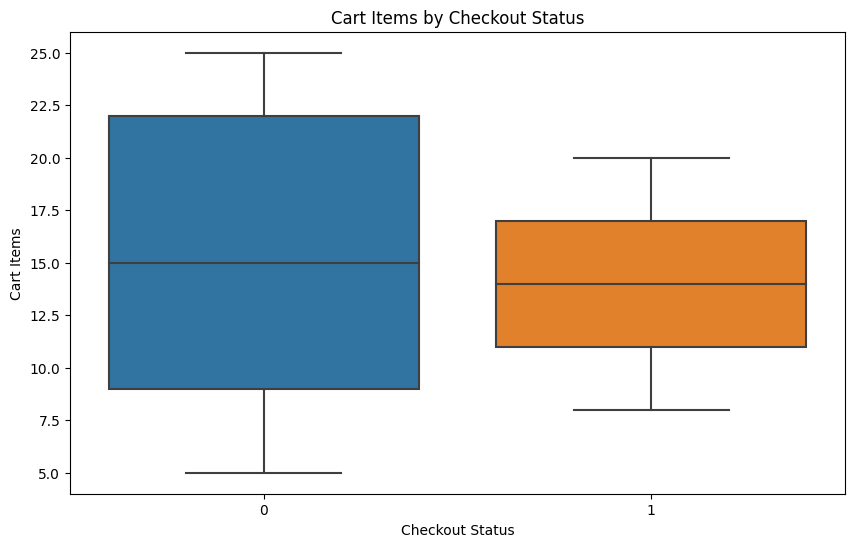

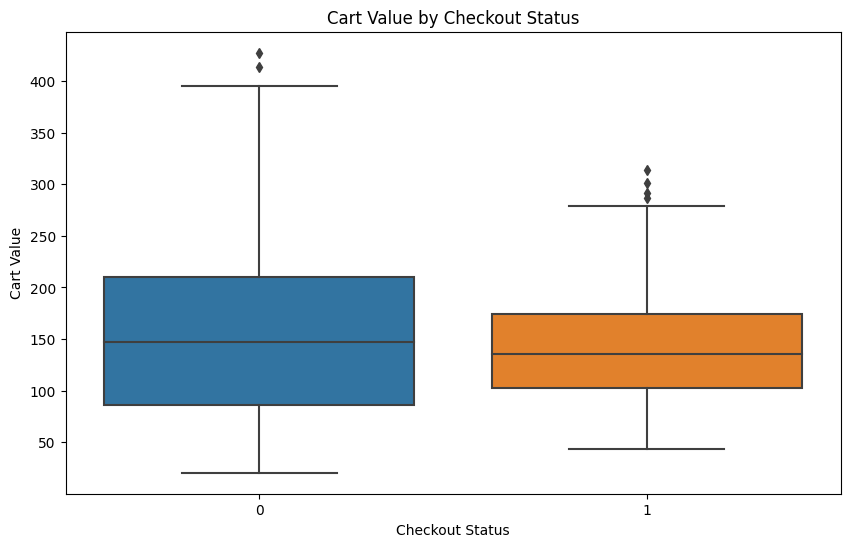

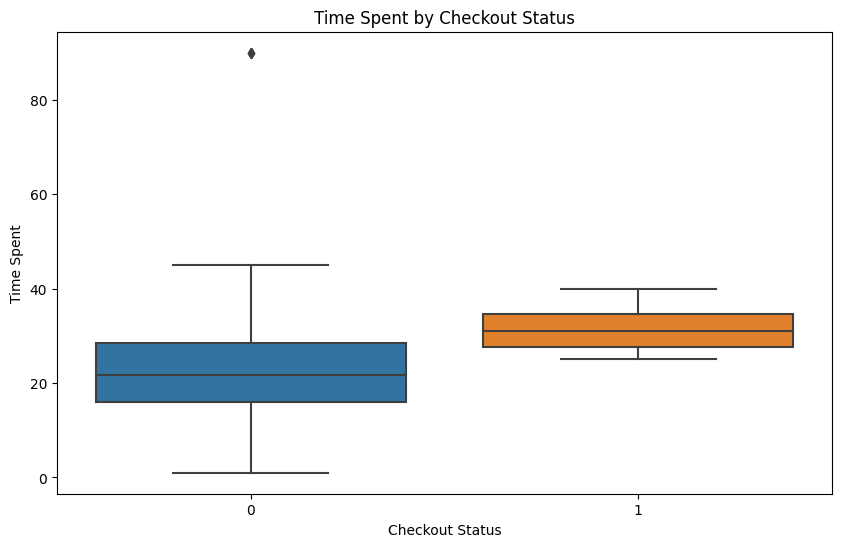

In [291]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='checkout_status', y='pages_visited', data=df)
plt.title('Pages Visited by Checkout Status')
plt.xlabel('Checkout Status')
plt.ylabel('Pages Visited')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='checkout_status', y='cart_items', data=df)
plt.title('Cart Items by Checkout Status')
plt.xlabel('Checkout Status')
plt.ylabel('Cart Items')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='checkout_status', y='cart_value', data=df)
plt.title('Cart Value by Checkout Status')
plt.xlabel('Checkout Status')
plt.ylabel('Cart Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='checkout_status', y='time_spent', data=df)
plt.title('Time Spent by Checkout Status')
plt.xlabel('Checkout Status')
plt.ylabel('Time Spent')
plt.show()


<Axes: xlabel='checkout_status', ylabel='pages_visited'>

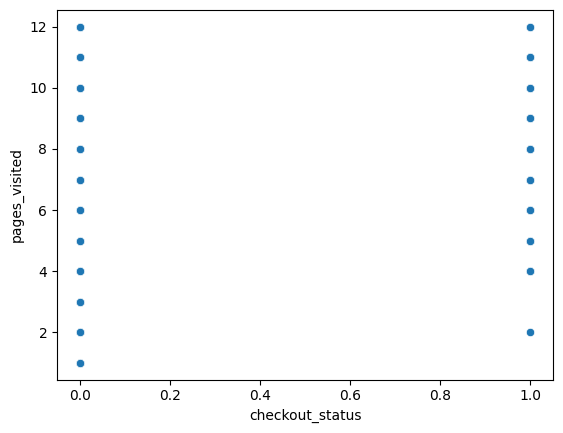

In [292]:
sns.scatterplot(x="checkout_status", y="pages_visited", data = df)

<Axes: xlabel='checkout_status', ylabel='time_spent'>

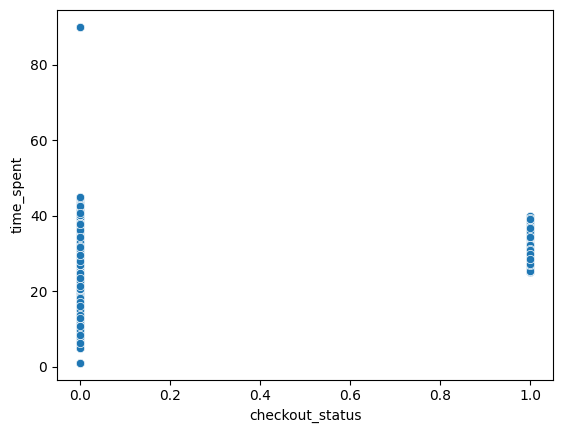

In [293]:
sns.scatterplot(x="checkout_status", y="time_spent", data = df)

<Axes: xlabel='checkout_status', ylabel='cart_items'>

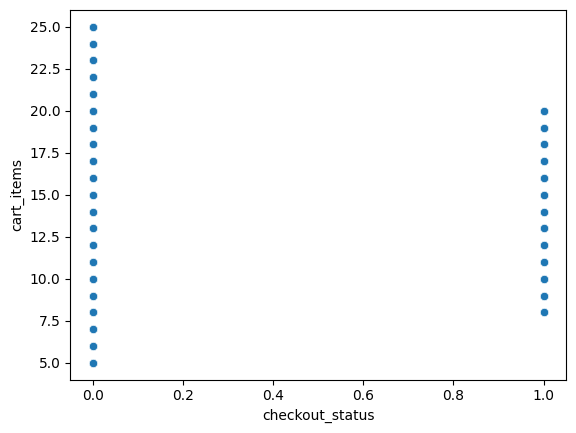

In [294]:
sns.scatterplot(x="checkout_status", y="cart_items", data = df)

<Axes: xlabel='checkout_status', ylabel='cart_value'>

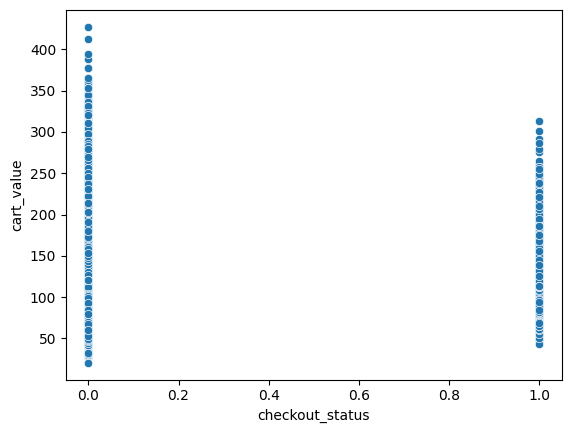

In [295]:
sns.scatterplot(x="checkout_status", y="cart_value", data = df)

In [307]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select the numerical features to be normalized
numerical_features = ['age', 'time_spent', 'pages_visited', 'cart_items', 'cart_value']

# Apply standardization to the selected features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [308]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply min-max scaling to the selected features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [312]:
# By location
df.groupby('location')[['time_spent','pages_visited','cart_items','cart_value','checkout_status']].mean()

,time_spent,pages_visited,cart_items,cart_value,checkout_status
location,,,,,
Location 1,0.277055,0.440053,0.509161,0.325469,0.280538
Location 2,0.269296,0.432012,0.500641,0.316525,0.267094
Location 3,0.268264,0.427491,0.494589,0.312722,0.265531
Location 4,0.271523,0.435002,0.489154,0.312436,0.283074
Location 5,0.271893,0.437193,0.500106,0.318725,0.270414


In [313]:
# By device
df.groupby('device')[['time_spent','pages_visited','cart_items','cart_value','checkout_status']].mean()

,time_spent,pages_visited,cart_items,cart_value,checkout_status
device,,,,,
Desktop,0.275299,0.441713,0.494647,0.316671,0.285488
Mobile,0.265587,0.423879,0.507234,0.321129,0.263938
Tablet,0.270711,0.430160,0.495976,0.312043,0.255365


In [ ]:
Q1
Device: Users on different devices show similar checkout_status
Location: Users from different locations also exhibit show similar checkout_status


Q2
a)Use df.info() to see the how many missing datas and the data type. Than descride see the details. Drop duplicates to aviod the duplicates cause skew statistical measures and analysis results 

b) Handle Missing Data: Check for missing values in the dataset, as they are object(category) drop them 

c)Use checkout_status to do the histplot and boxplot to see is there any outliers
From the graph we get there is no distinct outlier. So, don't drop.

d)Feature Scaling: Normalize numerical features to ensure that they are on a comparable scale. Common techniques for feature scaling include standardization (mean = 0, standard deviation = 1) or min-max scaling (scaling values to a specific range, e.g., 0-1).

Q3
Target High-Value Cart Users: Users with a higher number of items and cart value are more
Simplify Checkout Process: Evaluate the checkout process to identify any potential barriers or friction points that may discourage users from completing their purchase. 